# Purpose: Do analytically integrable functional fits from 1750-2011 to radiative shielding for the negative of the radiative forcing from tropospheric ozone and for, anthropogenic aerosols, and black carbon on snow.

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
# import datetime
import matplotlib.pyplot as plt
import numpy as np
# import sympy as sp
from scipy.optimize import curve_fit
import csv
import scipy
# import sympy
# import sympy as sym
import sympy as sp
from sympy import *
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17Forcings')

Read the specified input file

In [2]:
df1 = pd.read_excel('C:\\Users\\cd7\\Desktop\\Heat17Population\\heat19parameters16jul.xlsx')
df1.to_csv('heat19parameters16jul.csv',header=False,index=False)
df1 = pd.read_csv('heat19parameters16jul.csv')
# df1.drop(df1.head(1).index, inplace=True)
# df1.index = np.arange(0, len(df1))
# df1.drop(df1.head(1).index, inplace=True)
# df1.index = np.arange(0, len(df1))

df2 = pd.read_csv('OtherForcings.csv')
df2.drop(df2.tail(5).index,inplace=True) # drop last 5 rows
df2.index = np.arange(0, len(df2))
print (df1) 
print (type(df2)) 

            b1  JulianYrEtc    b3(Years)           b4  No.  No..1  \
0    10.664400  2003.343831    31.480115     1.000000   r1      1   
1     3.465660  2003.343831   162.813000   212.309000   f2      1   
2    18.252000  2011.180000    29.304500     2.130000   r3      4   
3     0.242542  1910.930000    19.632700     0.271308   g4      5   
4     0.199856  1932.790000     5.562510     1.515180   g5      5   
5     0.770546  1959.730000     9.130070     1.000000   g6      5   
6     0.964413  1993.140000    15.208900     1.000000   g7      5   
7    64.156200   871.320000   237.898000     1.000000   f8      1   
8   176.655000  1973.910000    41.383600     9.514280   r9      1   
9     5.140880   735.908000     7.279600     1.000000  r10      1   
10    2.391109  2003.343831    40.318314   121.000000  r11      1   
11    0.360664  1980.040000     7.521900  1750.000000  r12      1   
12    0.169096  2026.340000    17.811800  2017.000000  r13      1   
13    3.465660  2003.340000   162.

       Year    Both
0    1750.0 -0.0000
1    1751.0  0.0017
2    1752.0  0.0033
3    1753.0  0.0050
4    1754.0  0.0065
5    1755.0  0.0082
6    1756.0  0.0098
7    1757.0  0.0115
8    1758.0  0.0131
9    1759.0  0.0148
10   1760.0  0.0164
11   1761.0  0.0180
12   1762.0  0.0197
13   1763.0  0.0213
14   1764.0  0.0230
15   1765.0  0.0246
16   1766.0  0.0262
17   1767.0  0.0278
18   1768.0  0.0295
19   1769.0  0.0312
20   1770.0  0.0328
21   1771.0  0.0345
22   1772.0  0.0360
23   1773.0  0.0377
24   1774.0  0.0393
25   1775.0  0.0410
26   1776.0  0.0426
27   1777.0  0.0443
28   1778.0  0.0459
29   1779.0  0.0475
..      ...     ...
232  1982.0  0.7250
233  1983.0  0.7377
234  1984.0  0.7502
235  1985.0  0.7629
236  1986.0  0.7755
237  1987.0  0.7881
238  1988.0  0.8007
239  1989.0  0.8134
240  1990.0  0.8259
241  1991.0  0.8316
242  1992.0  0.8373
243  1993.0  0.8428
244  1994.0  0.8485
245  1995.0  0.8541
246  1996.0  0.8597
247  1997.0  0.8654
248  1998.0  0.8710
249  1999.0  0.8766


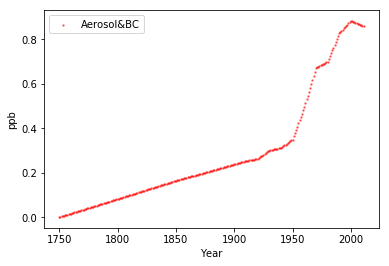

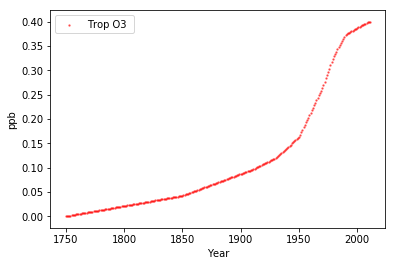

In [3]:
yrs = df2.iloc[:,0:1]
# yrs = df2.iloc[:,0]
# print (yrs)
# print (type(yrs))
shield = df2.iloc[:,6:7]

shield = df2['Aerosol (Total)'] + df2['BC Snow']

shield = shield.multiply(-1)
# shield = -data2[[All, 7]]
# print (shield)


shield = shield.to_frame(name='Both')

# print (type(shield))
df3 = pd.merge(yrs, shield, left_index =True, right_index =True,how='outer')
df3 = df3.astype(float)
print (df3)
df3.plot.scatter(x="Year", y="Both", color = 'r',label ='Aerosol&BC', s=2, alpha = 0.5)
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('ppb') 
plt.savefig('bc1.eps',dpi=1000)
plt.savefig('bc1.pdf',dpi=1000)

o3force = df2.iloc[:,3:4]
print (o3force)
df4 = pd.merge(yrs, o3force, left_index =True, right_index =True,how='outer')
df4 = df4.astype(float)
df4.plot.scatter(x="Year", y="O3 (Trop)", color = 'r',label ='Trop O3 ', s=2, alpha = 0.5)
plt.ylabel('ppb') 
plt.savefig('bc2.eps',dpi=1000)
plt.savefig('bc2.pdf',dpi=1000)

Fitting of Aerosol and Black Carbon snow

In [4]:
# df1 = df1.astype(float)
d1 = df1.iloc[1,0]
d2 = df1.iloc[1,1]
d3 = df1.iloc[1,2]
print(d1,d2,d3)
print(type(d1))

3.4656599999999997 2003.34383068 162.813
<class 'numpy.float64'>


In [5]:
def deforest(t):
    y = np.gradient(d1/(1 + np.exp(-(t-d2)/d3)),t)
#     y = y(t)
    return y
# deforest = np.vectorize(deforest)
# t = float(1750)
# deforest0 = float(deforest(t))
# deforest0 = float(deforest(1750))
# deforest0 = deforest(1750)
# deforest0 =  = 0.0030611452076103286


# import sympy as sp
t = sp.Symbol('t')
# y = x**2 + 1
y = d1/(1 + sp.exp(-(t-d2)/d3))
yprime = y.diff(t)
# yprime
f = lambdify(t, yprime, 'numpy')
# f(np.ones(5))
deforest0 = f(1750)
print(deforest0)



# deforest0 = 0.05
# x = sym.symbol('x')
# yprime = deforest.diff(x)
# f = lambdify(x, yprime, 'numpy')
# print(f(1750))
# deforest0  = np.arange(deforest0)
# deforest0 = [float(i) for i in deforest(1750)]
# print(type(deforest0))
print(deforest0)
# print (deforest(1750))
def denew(t):
    y = deforest(t)-deforest0
#     y = deforest(t)-deforest(1750)
#     y = float(deforest(t))-float(deforest0)
    return y

def fit(t,b1,b2,b3,b4):
    y = b4*denew(t) + b1*np.exp(-(1/2)*((t-b2)/b3)**2)
    return y
# fitaero = np.vectorize(fitaero)

0.0030623168018340985
0.0030623168018340985


In [6]:
yrs = yrs.iloc[:,0].tolist()
yrs = [float(i) for i in yrs]
# print (yrs)
shield = df3['Both']
shield = shield.tolist()
param_bounds=([0,1950,0,0],[1,2050,50,200])
popt1,pcov1 = curve_fit(fit, yrs, shield, bounds=param_bounds)
print (popt1)

[5.77146841e-01 2.00118685e+03 2.84968516e+01 1.31851796e+02]


In [7]:
o3force = df4['O3 (Trop)']
o3force = o3force.tolist()
# param_bounds2=([0,1950,0,0],[1,2050,50,200])
popt2,pcov2 = curve_fit(fit, yrs, o3force, bounds=param_bounds)
print (popt2)

[3.04674929e-01 2.00819572e+03 3.65564514e+01 4.21608880e+01]


In [8]:
def fito31(t):
    y = popt2[3]*denew(t)
    return y

def fito32(t):
    y = popt2[0]*np.exp(-(1/2)*((t-popt2[1])/popt2[2])**2)
    return y

def fito3(t):
    y = fito31(t) + fito32(t)
    return y
# print (fito3)
# fito3 = np.vectorize(fito3)

Plottings

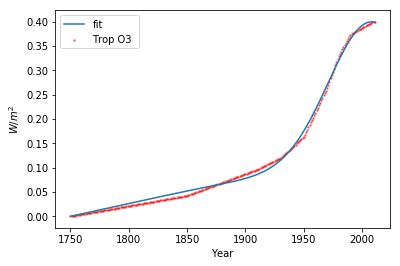

In [9]:
df4.plot.scatter(x="Year", y="O3 (Trop)", color = 'r',label ='Trop O3 ', s=2, alpha = 0.5)
# t = range(1750,2012)
# t = np.array(t)
# x_new = list(range(1750,2301)) # plot from year 1750 to 2300
# plt.plot(yrs,fito3, label ='fit')
fito3 = fit(yrs, *popt2)
plt.plot(yrs,fito3, label ='fit')
plt.legend(loc='best') 
plt.xlabel('Year') 
plt.ylabel('$W/m^2$') 
plt.savefig('o31.eps',dpi=1000)
plt.savefig('o31.pdf',dpi=1000)

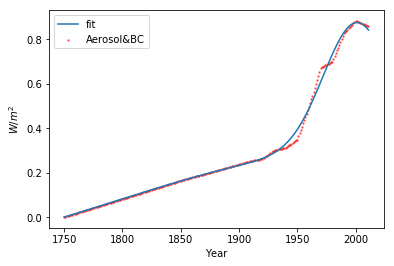

In [10]:
def fitaero1(t):
    y = popt1[3]*denew(t)
    return y

def fitaero2(t):
    y = popt1[0]*np.exp(-(1/2)*((t-popt1[1])/popt1[2])**2)
    return y
def fitaero(t):
    y = fitaero1(t) + fitaero2(t)
    return y

df3.plot.scatter(x="Year", y="Both", color = 'r',label ='Aerosol&BC', s=2, alpha = 0.5)
fitaero = fit(yrs, *popt1)
# df4.plot.scatter(x="Year", y="O3 (Trop)", color = 'r',label ='Trop O3 ', s=2, alpha = 0.5)
plt.xlabel('Year') 
plt.ylabel('$W/m^2$') 

plt.plot(yrs,fitaero, label ='fit')
plt.legend(loc='best')
# plt.xlabel('Year')
# plt.ylabel('ppb') 
# plt.savefig('o31.eps',dpi=1000)
# plt.savefig('o31.pdf',dpi=1000)
plt.savefig('bc3.eps',dpi=1000)
plt.savefig('bc3.pdf',dpi=1000)

Store the Ozone equations' parameters

In [11]:
# b1b2b3b4param = pd.DataFrame({'Fitted parameters':['b1', 'b2', 'b3','b4'], 'of Ozone':popt2, columns=["Fitted parameters", "of Ozone",'','']})
b1b2b3b4param = pd.DataFrame({'Fitted parameters':['b1', 'b2', 'b3','b4'], 'of Ozone':popt2})
b1b2b3b4param.loc[-1]=['Name','Values']
b1b2b3b4param.index = b1b2b3b4param.index+1
b1b2b3b4param = b1b2b3b4param.sort_index()
b1b2b3b4param.loc[(len(b1b2b3b4param))] = ['2018/07/21','heat18ozone11jun.nb']

b1b2b3b4param.to_csv('CAGE_O3_Parameters.csv', index=False,encoding='utf-8')